In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Emails.csv")

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df = df.drop("Email No.", axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [7]:
df.shape

(5172, 3001)

In [8]:
df.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [9]:
df = df.dropna(axis = 0)

In [10]:
df.shape

(5172, 3001)

In [11]:
X = df.drop("Prediction", axis = 1)
y = df["Prediction"]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 10)

In [14]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
knn_model.score(x_test, y_test)

0.8853092783505154

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [17]:
y_pred = knn_model.predict(x_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[515,  53],
       [ 36, 172]], dtype=int64)

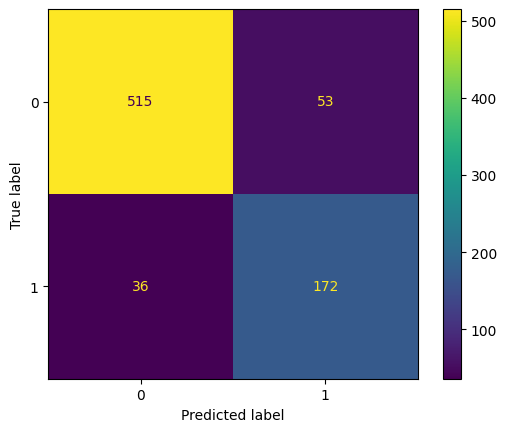

In [19]:
mat = ConfusionMatrixDisplay(cm)
mat.plot()
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       568
           1       0.76      0.83      0.79       208

    accuracy                           0.89       776
   macro avg       0.85      0.87      0.86       776
weighted avg       0.89      0.89      0.89       776



In [21]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)

accuracy_score: 


0.8853092783505154

In [22]:
print("precision_score: ")
precision_score(y_test, y_pred)

precision_score: 


0.7644444444444445

In [23]:
print("recall_score: ")
recall_score(y_test, y_pred)

recall_score: 


0.8269230769230769

In [24]:

print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.11469072164948457

In [25]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(x_train, y_train)
SVM.score(x_test, y_test)

0.9600515463917526

In [26]:
SVM.score(x_train, y_train)

0.9997725204731575

In [27]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[515,  53],
       [ 36, 172]], dtype=int64)

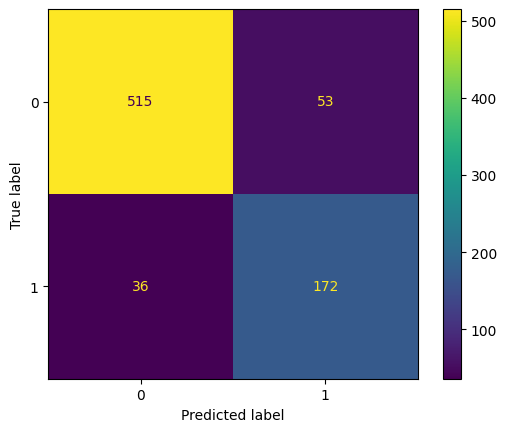

In [28]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       568
           1       0.76      0.83      0.79       208

    accuracy                           0.89       776
   macro avg       0.85      0.87      0.86       776
weighted avg       0.89      0.89      0.89       776



In [53]:
#poly, rbf, sigmoid, gamma, C